In this code, I use the pre-trianed model (adapted from tensorflow) and do object detection on some images from Kaggle dataset.  

# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import tensorflow_hub as hub

from PIL import Image, ImageColor, ImageDraw, ImageFont, ImageOps

import time

import os
print(os.listdir("../Computer_vision/input"))

['sample_submission.csv', 'test']


# Image path

In [2]:
def get_image_file_path(image_file_name):
    return '../Computer_vision/input/test/' + image_file_name

def get_images(n):
    """reads all the files from `../input/test` directory and returns paths for n files from top"""
    all_image_files = os.listdir("../Computer_vision/input/test/")
    image_paths = list(map(get_image_file_path, all_image_files))
    image_paths = image_paths[:n]
    return image_paths

In [3]:
# Checking the function
get_images(1)

['../Computer_vision/input/test/00ad8b71e53b8a1b.jpg']

# Detection Boxes

In [4]:
def display_image(image):
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

In [5]:
def draw_bounding_box_on_image(image, 
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               thickness=3,
                               text = ()):
    
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
    
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width = thickness, fill = color)
    
    font = ImageFont.load_default()
    text_width, text_height = font.getsize(text)
    draw.rectangle([(left, top - 1.5 * text_height), (left + 1.5 * text_width, top)], fill='white')
    draw.text((left+2, top - 1.5 * text_height), text, fill = 'black', font = ImageFont.load_default())


In [6]:
def draw_boxes(image, boxes, class_name, max_size = 15):
    for i in range(min(boxes.shape[0], max_size)):
        ymin, xmin, ymax, xmax = tuple(boxes[i])
        color = list(ImageColor.colormap.values())[i]
        text = str(class_name[i])
        #image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
        draw_bounding_box_on_image(image, 
                                   ymin, 
                                   xmin,
                                   ymax,
                                   xmax,
                                   color,
                                   text = text)
        #np.copyto(image, np.array(image_pil))
    return image

# Apply modulation (InceptionResNet V2) from tenserflow hub

In [8]:
detector = hub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1").signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [14]:
def detect_object(path, detector):
    image = Image.open(path)
    
    results = detector(tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...])
    results = {key:value.numpy() for key,value in results.items()}
    
    image = Image.open(path)
    return draw_boxes(image, results["detection_boxes"], results["detection_class_entities"])

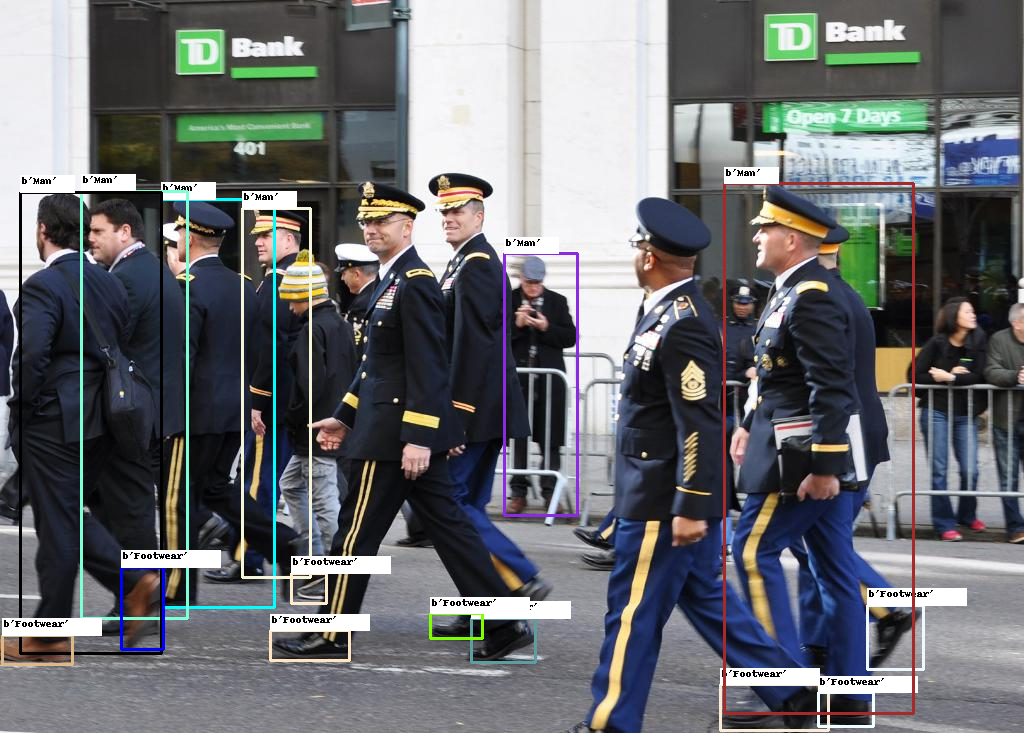

In [15]:
detect_object(get_images(5)[0], detector)

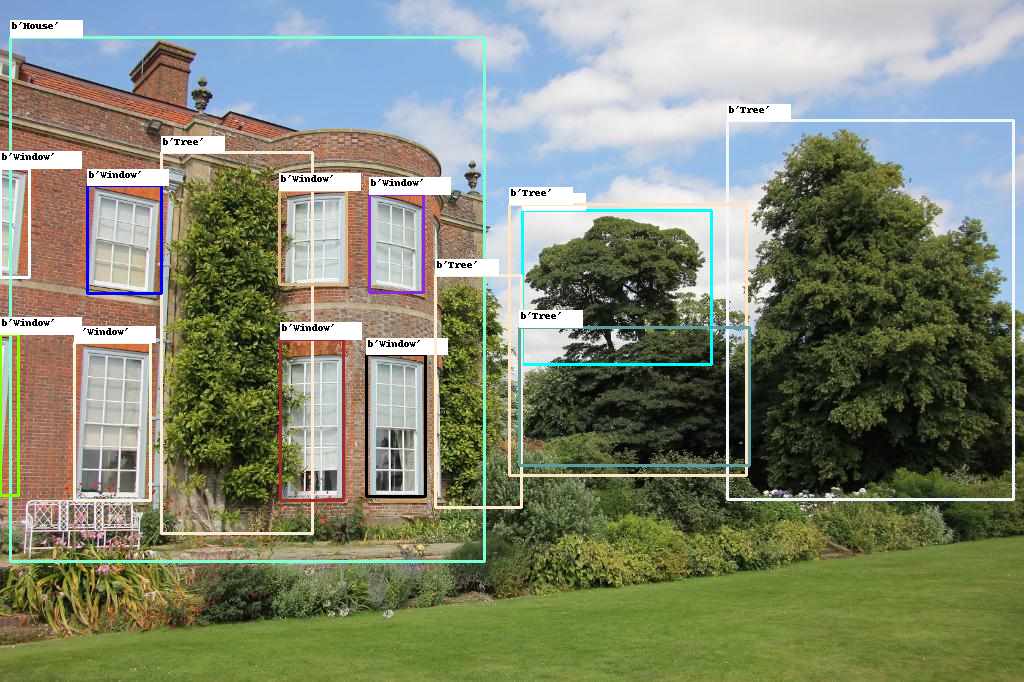

In [11]:
# Let's look at another random image
detect_object(get_images(5)[2], detector)

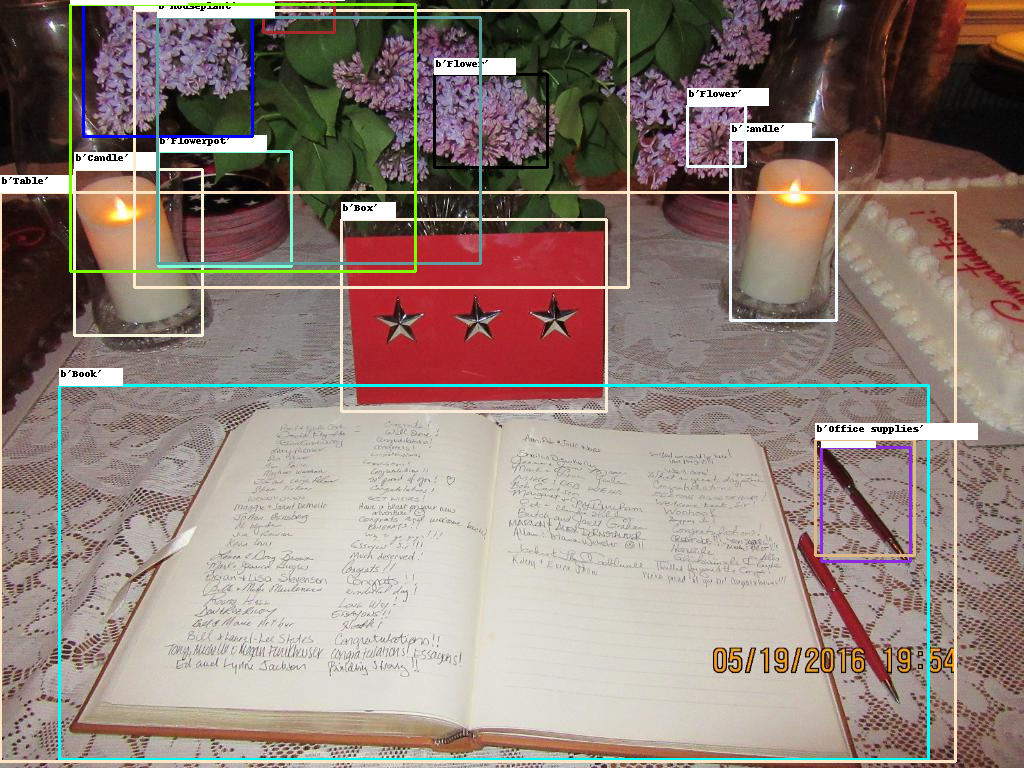

In [18]:
# Let's look at another random image
detect_object(get_images(5)[1], detector)